In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
from sklearn import preprocessing as prepro
import seaborn as sns
from collections import deque
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')
import plotly_express as px
import kagglehub

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from scipy.spatial.distance import euclidean

from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler


In [2]:
# Download latest version
path = kagglehub.dataset_download("jonbown/christmas-movies")

print("Path to dataset files:", path)

KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/jonbown/christmas-movies
Please make sure you specified the correct resource identifiers.

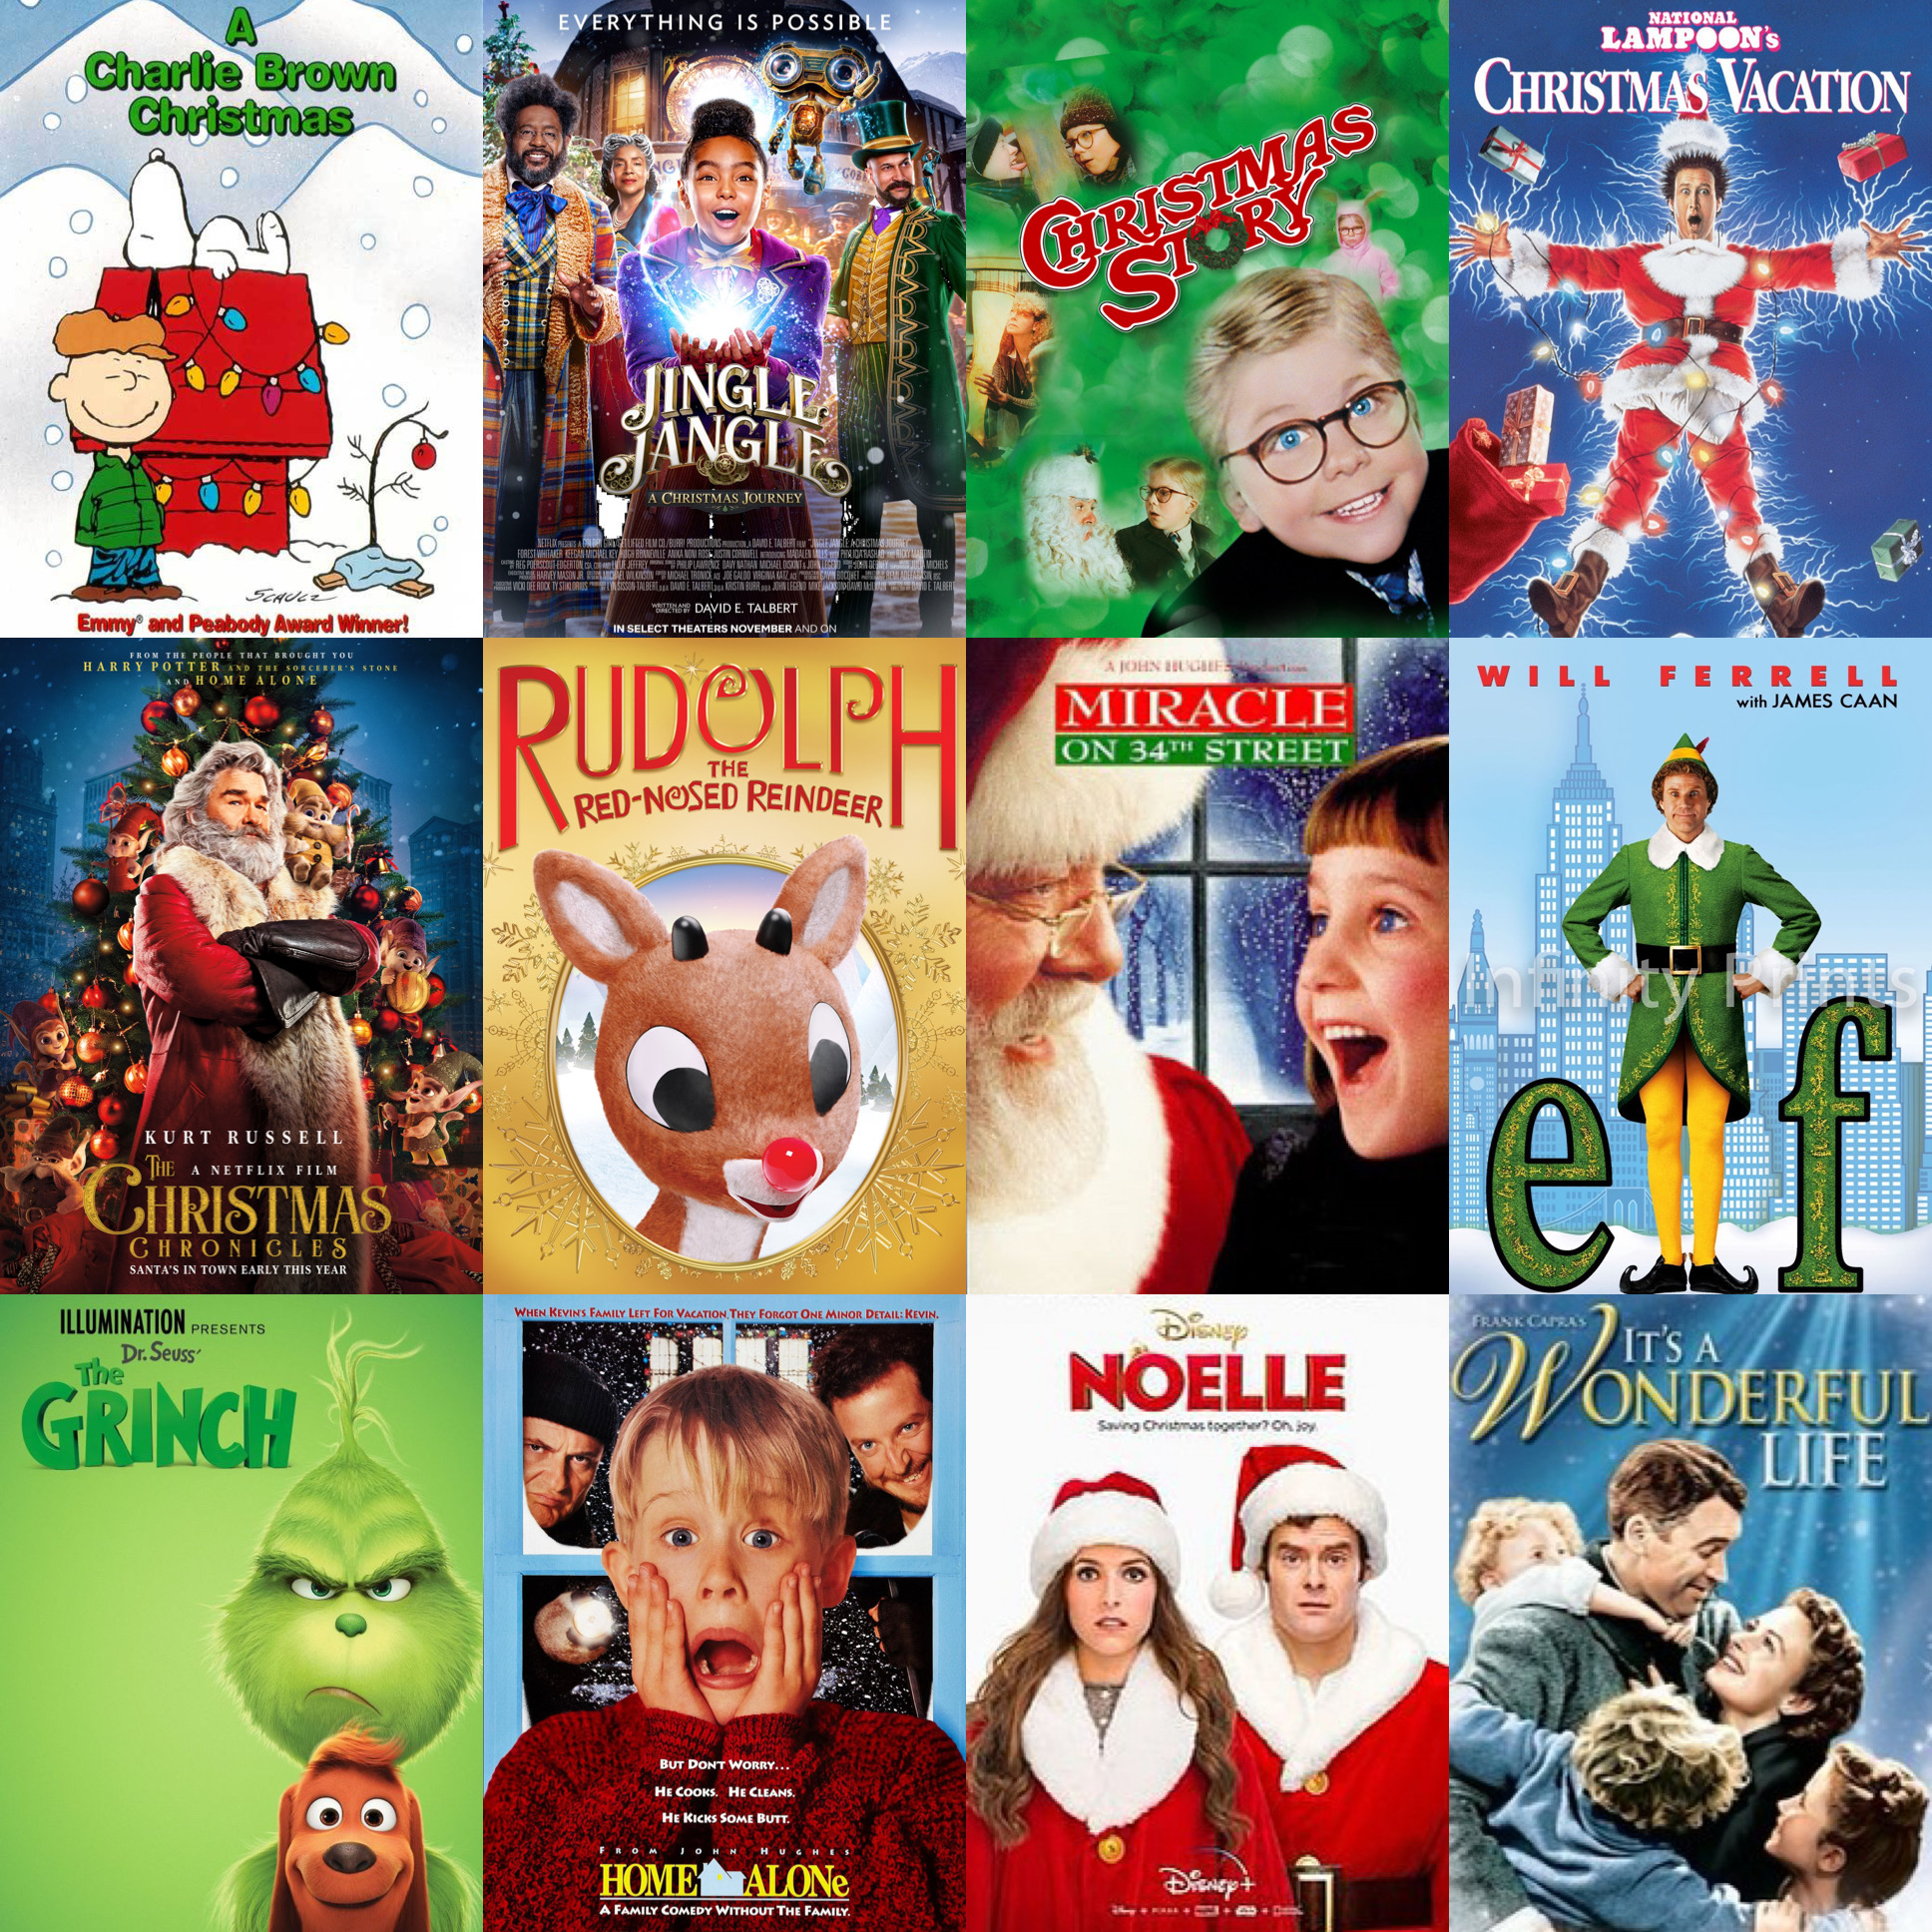

In [3]:
xmas_df = pd.read_csv("C:\Projects\ML_course\christmas_movies.csv")
xmas_df.head()

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","517,283",$59.70M,https://m.media-amazon.com/images/M/MV5BNThkNj...,Movie
1,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","629,713",$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","213,196",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie
3,Elf,PG,97.0,7.1,66.0,"Adventure, Comedy, Family",2003.0,"Raised as an oversized elf, Buddy travels from...",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...","300,546",$173.40M,https://m.media-amazon.com/images/M/MV5BMzUxNz...,Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,46.0,"Comedy, Family, Fantasy",2000.0,"On the outskirts of Whoville lives a green, re...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","280,898",$260.04M,https://m.media-amazon.com/images/M/MV5BNWNiNT...,Movie


Data Cleaning & Prep

In [4]:
xmas_df = xmas_df.drop_duplicates()

In [5]:
xmas_df.shape

(873, 14)

In [6]:
xmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         873 non-null    object 
 1   rating        660 non-null    object 
 2   runtime       832 non-null    float64
 3   imdb_rating   839 non-null    float64
 4   meta_score    100 non-null    float64
 5   genre         872 non-null    object 
 6   release_year  862 non-null    float64
 7   description   873 non-null    object 
 8   director      868 non-null    object 
 9   stars         862 non-null    object 
 10  votes         839 non-null    object 
 11  gross         79 non-null     object 
 12  img_src       873 non-null    object 
 13  type          873 non-null    object 
dtypes: float64(4), object(10)
memory usage: 95.6+ KB


title         Drop duplicates
rating        Replace with mode
runtime       Replace with mean
imdb_rating   Replace with mean
meta_score    As only 100 non-null, drop
genre         Vectorize
release_year  Replace with mean
votes         Make numerik and Replace with mean
The rest columns I will drop

In [7]:
xmas_df = xmas_df.drop(['description','meta_score','gross', 'img_src', 'director', 'stars', 'gross'], axis=1)
xmas_df.head()

,title,rating,runtime,imdb_rating,genre,release_year,votes,type
0,Love Actually,R,135.0,7.6,"Comedy, Drama, Romance",2003.0,"517,283",Movie
1,Home Alone,PG,103.0,7.7,"Comedy, Family",1990.0,"629,713",Movie
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,Comedy,1989.0,"213,196",Movie
3,Elf,PG,97.0,7.1,"Adventure, Comedy, Family",2003.0,"300,546",Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,"Comedy, Family, Fantasy",2000.0,"280,898",Movie


In [8]:
xmas_df.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'genre', 'release_year',
       'votes', 'type'],
      dtype='object')

Title: 848 unique values (titles)
Rating: Missing 213 24%
Runtime: Valid 832 95% Mismatched 0 0% Missing 41 5%


In [9]:
xmas_df.title.describe()

count                   873
unique                  848
top       A Christmas Carol
freq                      6
Name: title, dtype: object

In [10]:
xmas_df.title.drop_duplicates

<bound method Series.drop_duplicates of 0                                          Love Actually
1                                             Home Alone
2                  National Lampoon's Christmas Vacation
3                                                    Elf
4                         How the Grinch Stole Christmas
                             ...                        
868    CBS News Sunday Morning with Jane Pauley: Epis...
869            Honest Ads: If Holiday Movies Were Honest
870                     Cosmic Cowboys: Céréal Christmas
871    Proper Manors: Christmas Special: Christmas Pa...
872        Sacred Music at Christmas: A Choral Christmas
Name: title, Length: 873, dtype: object>

In [11]:
xmas_df['rating'].fillna((xmas_df['rating'].mode()), inplace=True)

In [12]:
xmas_df['imdb_rating'].fillna((xmas_df['imdb_rating'].mean()), inplace=True)

In [13]:
xmas_df['release_year'].fillna((xmas_df['release_year'].mean()), inplace=True)

In [14]:
xmas_df["votes"] = xmas_df["votes"].str.replace(',', '')
xmas_df["votes"] = xmas_df["votes"].apply(lambda x: int(x) if pd.notnull(x) else x)
xmas_df['votes'].fillna((xmas_df['votes'].mean()), inplace=True)

vectorizing

In [15]:
# Get dummy variables for specified columns
xmas_df = pd.get_dummies(xmas_df, columns=["rating", "type"], drop_first=True)

# Select only the dummy columns (ending with '_<value>')
dummy_columns = [col for col in xmas_df.columns if "rating_" in col or "type_" in col]

# Convert only the dummy columns to integers
xmas_df[dummy_columns] = xmas_df[dummy_columns].astype(int)


In [16]:
xmas_df.head()

,title,runtime,imdb_rating,genre,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_Unrated,type_TV Episode
0,Love Actually,135.0,7.6,"Comedy, Drama, Romance",2003.0,517283.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Home Alone,103.0,7.7,"Comedy, Family",1990.0,629713.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,National Lampoon's Christmas Vacation,97.0,7.5,Comedy,1989.0,213196.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Elf,97.0,7.1,"Adventure, Comedy, Family",2003.0,300546.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,How the Grinch Stole Christmas,104.0,6.3,"Comedy, Family, Fantasy",2000.0,280898.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
xmas_df['rating_Not Rated'].sum()

54

In [18]:
xmas_df = xmas_df[xmas_df["rating_Unrated"] != True]
xmas_df = xmas_df[xmas_df["rating_Not Rated"] != True]

In [19]:
xmas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 872
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             809 non-null    object 
 1   runtime           769 non-null    float64
 2   imdb_rating       809 non-null    float64
 3   genre             808 non-null    object 
 4   release_year      809 non-null    float64
 5   votes             809 non-null    float64
 6   rating_G          809 non-null    int32  
 7   rating_Not Rated  809 non-null    int32  
 8   rating_PG         809 non-null    int32  
 9   rating_PG-13      809 non-null    int32  
 10  rating_Passed     809 non-null    int32  
 11  rating_R          809 non-null    int32  
 12  rating_TV-14      809 non-null    int32  
 13  rating_TV-G       809 non-null    int32  
 14  rating_TV-MA      809 non-null    int32  
 15  rating_TV-PG      809 non-null    int32  
 16  rating_TV-Y       809 non-null    int32  
 17  ra

In [20]:
# Create binary columns for genres
genre_dummies = xmas_df["genre"].str.get_dummies(sep=", ")

# Concatenate the binary columns with the original DataFrame
xmas_df = pd.concat([xmas_df, genre_dummies], axis=1)

xmas_df = xmas_df.drop(columns=["genre"])


In [21]:
xmas_df_names = xmas_df.title
xmas_df.head()

,title,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Love Actually,135.0,7.6,2003.0,517283.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Home Alone,103.0,7.7,1990.0,629713.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,National Lampoon's Christmas Vacation,97.0,7.5,1989.0,213196.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Elf,97.0,7.1,2003.0,300546.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,How the Grinch Stole Christmas,104.0,6.3,2000.0,280898.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
xmas_df_names

0                                          Love Actually
1                                             Home Alone
2                  National Lampoon's Christmas Vacation
3                                                    Elf
4                         How the Grinch Stole Christmas
                             ...                        
868    CBS News Sunday Morning with Jane Pauley: Epis...
869            Honest Ads: If Holiday Movies Were Honest
870                     Cosmic Cowboys: Céréal Christmas
871    Proper Manors: Christmas Special: Christmas Pa...
872        Sacred Music at Christmas: A Choral Christmas
Name: title, Length: 809, dtype: object

In [23]:
xmas_df = xmas_df.set_index("title")

In [24]:
xmas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, Love Actually to Sacred Music at Christmas: A Choral Christmas
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   runtime           769 non-null    float64
 1   imdb_rating       809 non-null    float64
 2   release_year      809 non-null    float64
 3   votes             809 non-null    float64
 4   rating_G          809 non-null    int32  
 5   rating_Not Rated  809 non-null    int32  
 6   rating_PG         809 non-null    int32  
 7   rating_PG-13      809 non-null    int32  
 8   rating_Passed     809 non-null    int32  
 9   rating_R          809 non-null    int32  
 10  rating_TV-14      809 non-null    int32  
 11  rating_TV-G       809 non-null    int32  
 12  rating_TV-MA      809 non-null    int32  
 13  rating_TV-PG      809 non-null    int32  
 14  rating_TV-Y       809 non-null    int32  
 15  rating_Unrated    809 non-null    int32  


In [25]:
xmas_df.columns

Index(['runtime', 'imdb_rating', 'release_year', 'votes', 'rating_G',
       'rating_Not Rated', 'rating_PG', 'rating_PG-13', 'rating_Passed',
       'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA',
       'rating_TV-PG', 'rating_TV-Y', 'rating_Unrated', 'type_TV Episode',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
xmas_df['runtime'].fillna((xmas_df['runtime'].mean()), inplace=True)

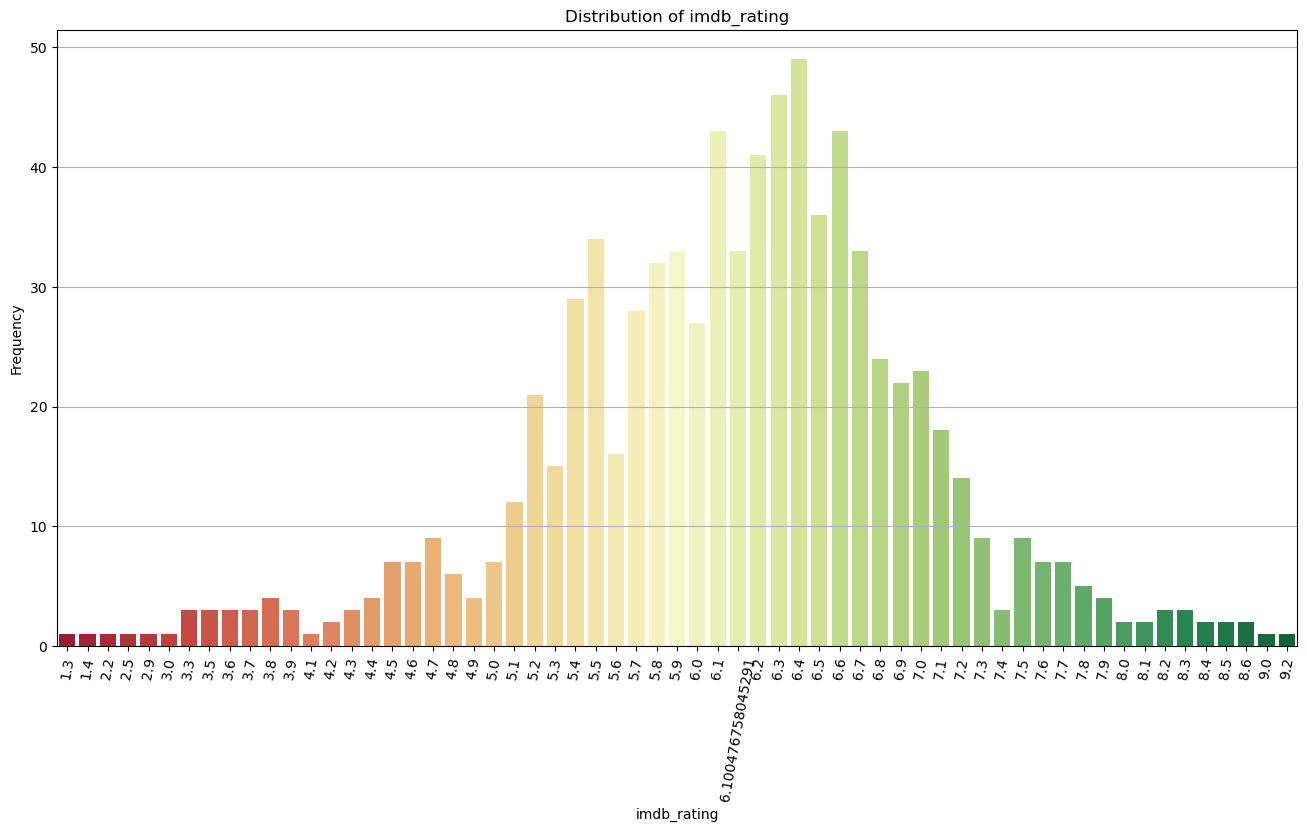

In [27]:
Distribution_imdb_rating = xmas_df['imdb_rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_imdb_rating.index, y=Distribution_imdb_rating.values, palette='RdYlGn')
plt.title("Distribution of imdb_rating")
plt.xlabel('imdb_rating')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.grid(True, axis='y')
plt.show()

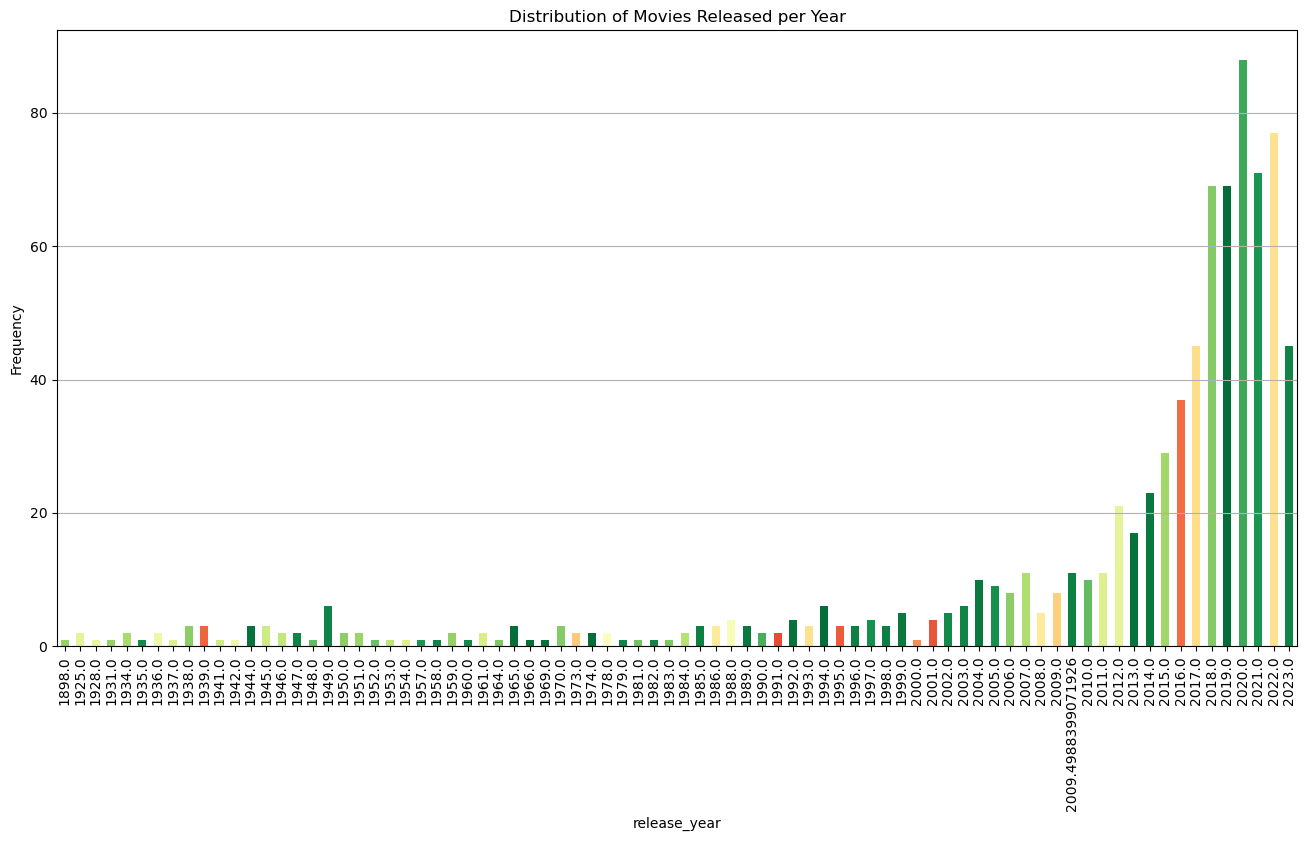

In [28]:
years = xmas_df["release_year"].unique()
years.sort()

colors = sns.color_palette("RdYlGn", len(years))

color_mapping = {year: colors[i] for i, year in enumerate(years)}

bar_colors = xmas_df["release_year"].map(color_mapping)

Freq = xmas_df["release_year"].value_counts().sort_index().plot(
    kind="bar", 
    title="Distribution of Movies Released per Year", 
    figsize=(16, 8), 
    color=bar_colors
)

Freq.set_xlabel("release_year")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

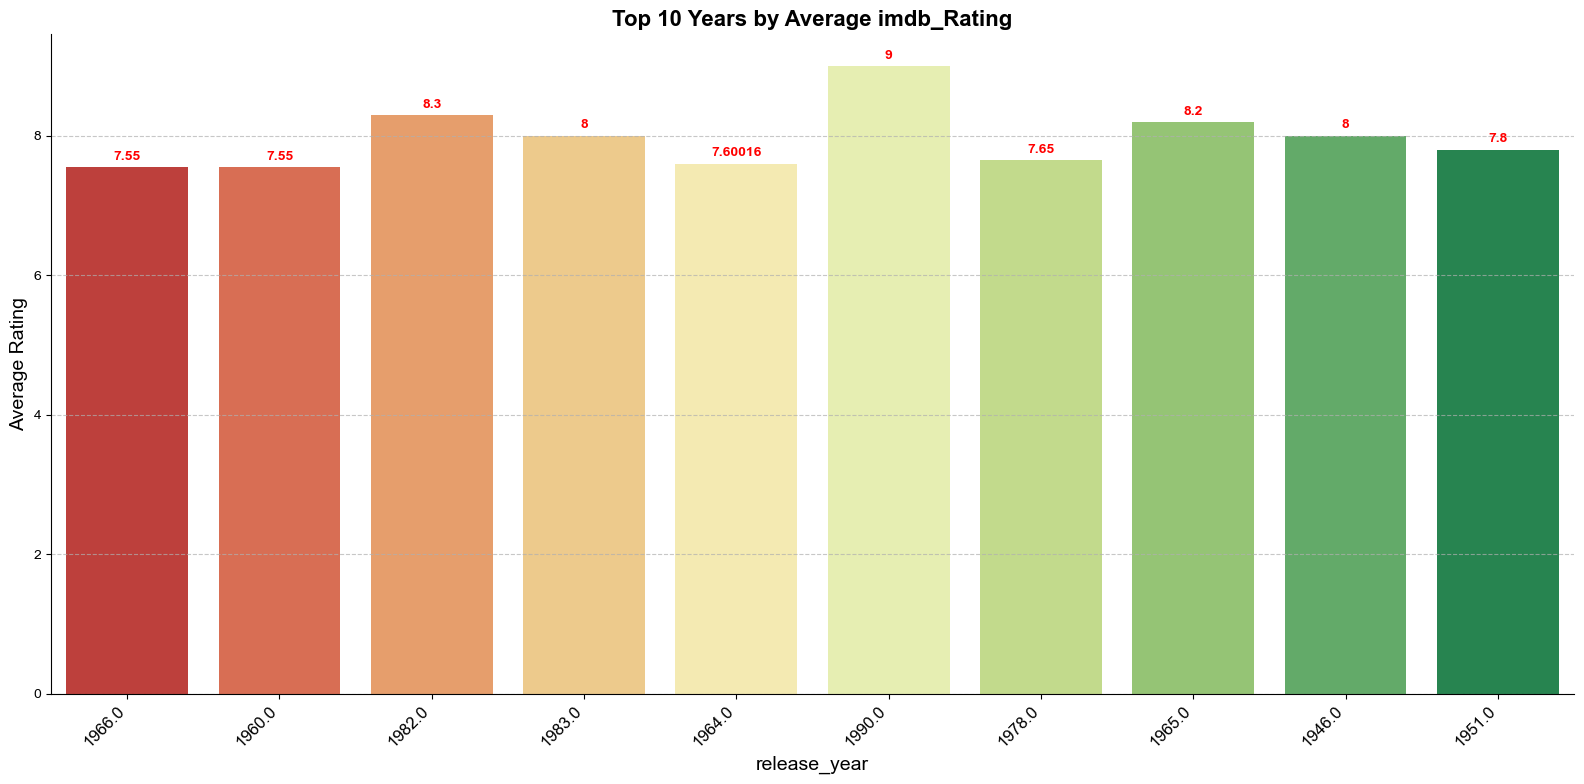

In [29]:
fig, axes = plt.subplots(figsize=(16, 8))
grouped = xmas_df.groupby("release_year")
mean = pd.DataFrame(grouped["imdb_rating"].mean())
mean1 = mean.sort_values("imdb_rating", ascending=False).head(10)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1.index, y=mean1["imdb_rating"], ax=axes, palette='RdYlGn')

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='red', weight='bold')

axes.set_xticklabels(mean1.index, rotation=45, ha='right', fontsize=12)

axes.set_xlabel('release_year', fontsize=14)
axes.set_ylabel('Average Rating', fontsize=14)
axes.set_title('Top 10 Years by Average imdb_Rating', fontsize=16, weight='bold')

axes.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine()

sns.set(style="darkgrid")

plt.tight_layout()
plt.show()

In [30]:
def preprocess_data(xmas_df):
    """
    Preprocess the dataset: 
    - Fill missing values with mean (if any).
    - Normalize the data using Min-Max scaling.
    """
    # Fill missing values with the column mean
    xmas_df.fillna(xmas_df.mean(), inplace=True)
    
    # Normalize numerical features using MinMax scaling
    scaler = MinMaxScaler()
    xmas_df_scaled = pd.DataFrame(scaler.fit_transform(xmas_df), columns=xmas_df.columns)
    
    return xmas_df_scaled

# Preprocess the data
xmas_df_scaled = preprocess_data(xmas_df)

# Run k-Means, DBSCAN, and Hierarchical clustering


In [31]:
xmas_df_scaled.head()

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.676768,0.797468,0.840,0.559427,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.515152,0.810127,0.736,0.681019,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.484848,0.784810,0.728,0.230559,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.484848,0.734177,0.840,0.325027,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.520202,0.632911,0.816,0.303778,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


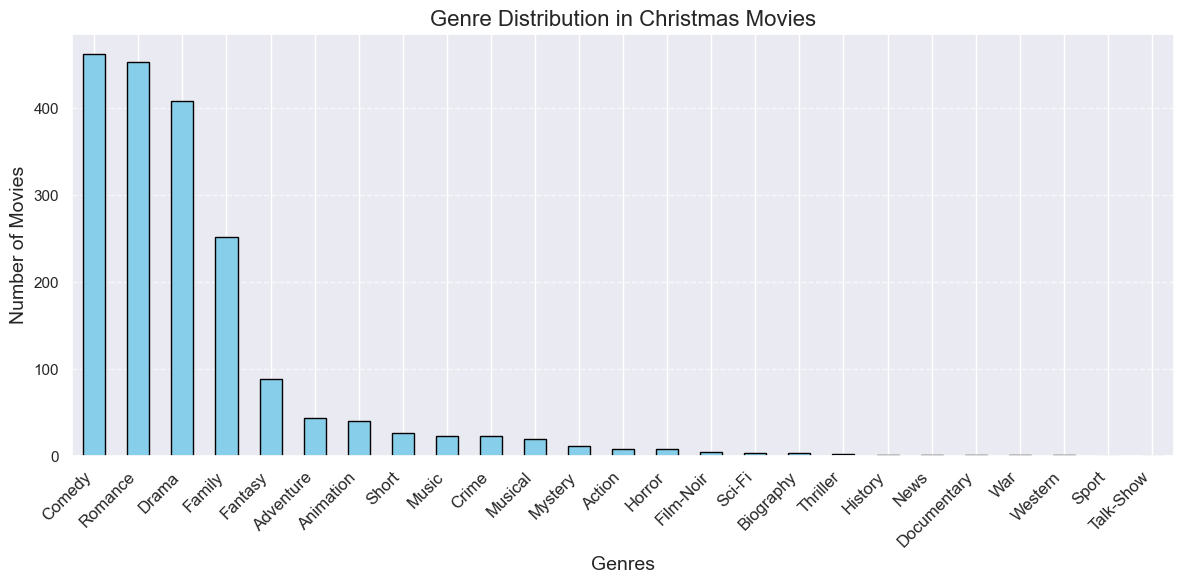

Comedy         462
Romance        453
Drama          409
Family         252
Fantasy         89
Adventure       44
Animation       41
Short           27
Music           24
Crime           24
Musical         20
Mystery         12
Action           9
Horror           9
Film-Noir        5
Sci-Fi           4
Biography        4
Thriller         3
History          2
News             2
Documentary      2
War              2
Western          2
Sport            1
Talk-Show        1
dtype: int64


In [50]:
genre_columns = xmas_df.columns[17:42]  # Adjusted for Python's zero-based indexing

# Calculate the distribution of each genre
genre_distribution = xmas_df[genre_columns].sum().sort_values(ascending=False)

# Plot the genre distribution as a bar chart
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Genre Distribution in Christmas Movies", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the numerical distribution as a DataFrame
print(genre_distribution)


## Clastering

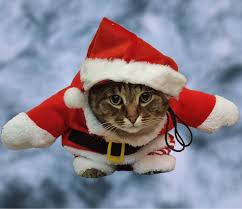

In [32]:
# --- k-Means Clustering Implementation ---
def kmeans(X, k=3, max_iters=100):
    """
    Implementation of k-Means clustering algorithm.
    """
    # Initialize centroids randomly
    centroids = X.sample(k).values
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        # Step 1: Assign points to nearest centroid
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X.values[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Step 2: Calculate new centroids
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)

        # Step 3: Check for convergence
        if np.all(centroids == prev_centroids):
            break
        prev_centroids = centroids.copy()

    return centroids, labels

# --- DBSCAN Clustering Implementation ---
def dbscan(X, epsilon=0.5, min_pts=5):
    """
    Implementation of DBSCAN clustering algorithm.
    """
    labels = np.full(X.shape[0], -1)  # -1 represents noise
    core_points = []
    for i in range(X.shape[0]):
        # Find neighbors of the point
        neighbors = [j for j in range(X.shape[0]) if np.linalg.norm(X.values[i] - X.values[j]) <= epsilon]
        if len(neighbors) >= min_pts:
            core_points.append(i)
            labels[i] = len(core_points)  # Assign a new cluster id
            for neighbor in neighbors:
                if labels[neighbor] == -1:  # Mark as part of the cluster if not already visited
                    labels[neighbor] = labels[i]
    
    return labels

# --- Hierarchical Clustering Implementation ---
def hierarchical_clustering(X):
    """
    Implementation of Agglomerative Hierarchical Clustering.
    """
    from scipy.cluster.hierarchy import linkage, fcluster
    Z = linkage(X, method='ward')
    labels = fcluster(Z, t=3, criterion='maxclust')  # Set the number of clusters to 3
    return labels

# --- Internal Evaluation Metrics ---
def calinski_harabasz(X, labels):
    """
    Calinski-Harabasz Index: Measures how well-defined the clusters are.
    """
    from sklearn.metrics import calinski_harabasz_score
    return calinski_harabasz_score(X, labels)

def davies_bouldin(X, labels):
    """
    Davies-Bouldin Index: Measures the compactness and separation of clusters.
    """
    from sklearn.metrics import davies_bouldin_score
    return davies_bouldin_score(X, labels)

# --- Dimensionality Reduction ---

def plot_tsne_umap(X, labels, method='t-SNE'):
    """
    Plots the reduced data in 2D using t-SNE or UMAP.
    """
    if method == 't-SNE':
        reduced_X = TSNE(n_components=2).fit_transform(X)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2)
        reduced_X = reducer.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap='viridis')
    plt.title(f"{method} Visualization")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar()
    plt.show()

# --- Main Code Execution ---



In [33]:
from scipy.spatial import distance

### DBSCAN

In [34]:


def simple_DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):
    """
    Driver for DBSCAN algorithm; expands clusters and assigns points to clusters.
    """
    currentPoint = 0
    
    for i in range(0, X.shape[0]):
        if clusters[i] != 0:  # Skip points already assigned to clusters
            continue
    
        neighbors = neighborsGen(X, i, eps, metric)
        
        if len(neighbors) < minPts:
            clusters[i] = -1  # Label as noise
        else:
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
    
    return clusters

def neighborsGen(X, point, eps, metric):
    """
    Generates neighborhood for a given point.
    """
    neighbors = []
    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps:
            neighbors.append(i)
    return neighbors

def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
    """
    Expands cluster starting from a given point, adding all reachable points.
    """
    clusters[point] = currentPoint
    i = 0
    while i < len(neighbors):
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
        
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            if len(nextNeighbors) >= minPts:
                neighbors.extend(nextNeighbors)
        
        i += 1

class Basic_DBSCAN:
    """
    DBSCAN algorithm with tunable eps and minPts parameters.
    """
    
    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
    
    def fit_predict(self, X):
        """
        Clusters data X and returns labels for each point.
        """
        clusters = [0] * X.shape[0]  # Initialize all points as unassigned (0)
        simple_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)
        return clusters


Best eps: 0.3
Best minPts: 4
Best Calinski-Harabasz score: 22.837181070676344
Best Davies-Bouldin score: 1.2392015421595648


  File "c:\Tools\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


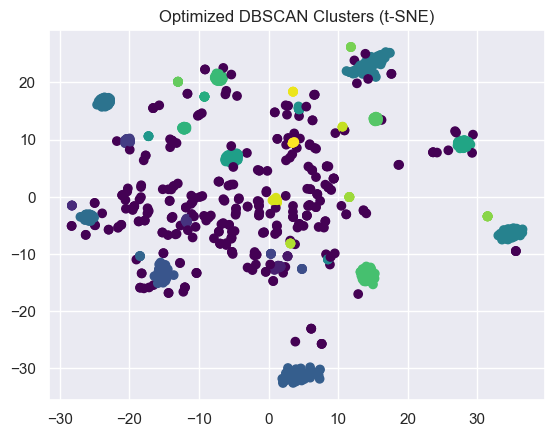

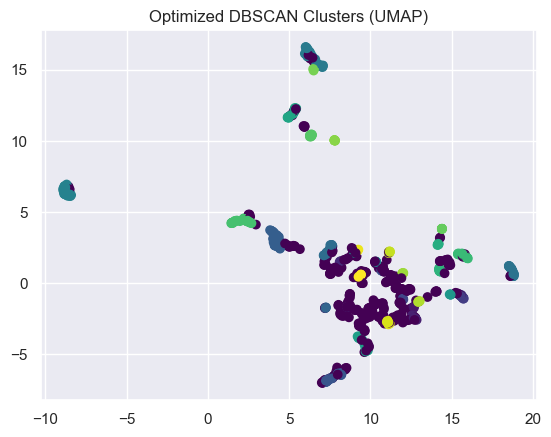

In [35]:


def optimize_dbscan(X_scaled, eps_values, minPts_values, metric=distance.euclidean):

    best_calinski = -np.inf  # Calinski-Harabasz is maximized
    best_davies_bouldin = np.inf  # Davies-Bouldin is minimized
    best_eps = None
    best_minPts = None
    best_clusters = None

    # Try different combinations of eps and minPts
    for eps in eps_values:
        for minPts in minPts_values:
            # Initialize DBSCAN
            dbscan = Basic_DBSCAN(eps=eps, minPts=minPts, metric=metric)
            clusters = dbscan.fit_predict(X_scaled)

            # Compute the evaluation metrics
            if len(set(clusters)) > 1:  # Avoid empty clusters
                calinski_score = calinski_harabasz_score(X_scaled, clusters)
                davies_score = davies_bouldin_score(X_scaled, clusters)

                # Update the best scores
                if calinski_score > best_calinski and davies_score < best_davies_bouldin:
                    best_calinski = calinski_score
                    best_davies_bouldin = davies_score
                    best_eps = eps
                    best_minPts = minPts
                    best_clusters = clusters

    return best_eps, best_minPts, best_calinski, best_davies_bouldin, best_clusters

# Example usage:

# Define ranges of eps and minPts to explore
eps_values = [0.3, 0.5, 0.7, 1.0, 1.5]
minPts_values = [4, 5, 6, 7, 8]

X = np.array(xmas_df_scaled)


# Optimize DBSCAN
best_eps, best_minPts, best_calinski, best_davies_bouldin, best_clusters = optimize_dbscan(X, eps_values, minPts_values)

# Print the results
print(f"Best eps: {best_eps}")
print(f"Best minPts: {best_minPts}")
print(f"Best Calinski-Harabasz score: {best_calinski}")
print(f"Best Davies-Bouldin score: {best_davies_bouldin}")


# Visualize using t-SNE
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=best_clusters, cmap='viridis')
plt.title("Optimized DBSCAN Clusters (t-SNE)")
plt.show()

# Visualize using UMAP
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=best_clusters, cmap='viridis')
plt.title("Optimized DBSCAN Clusters (UMAP)")
plt.show()


In [51]:
from sklearn.cluster import DBSCAN
def evaluate_clustering(X, labels):
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    return ch_score, db_score

dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan.fit(X)

lab= dbscan.labels_
set(lab)
ch_score, db_score = evaluate_clustering(X, lab)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

Calinski-Harabasz Index: 22.837181070676344
Davies-Bouldin Index: 1.2392015421595648


In [36]:
best_clusters

[-1,
 -1,
 -1,
 1,
 6,
 -1,
 -1,
 -1,
 -1,
 -1,
 7,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 2,
 -1,
 3,
 -1,
 -1,
 -1,
 4,
 -1,
 1,
 -1,
 2,
 5,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 6,
 -1,
 -1,
 7,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 8,
 -1,
 9,
 -1,
 10,
 -1,
 1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 10,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 11,
 12,
 10,
 -1,
 -1,
 10,
 13,
 -1,
 -1,
 -1,
 -1,
 -1,
 8,
 -1,
 2,
 14,
 -1,
 -1,
 13,
 15,
 -1,
 -1,
 -1,
 -1,
 -1,
 16,
 17,
 18,
 -1,
 -1,
 19,
 20,
 18,
 -1,
 6,
 13,
 -1,
 -1,
 12,
 3,
 21,
 3,
 19,
 -1,
 16,
 22,
 -1,
 -1,
 19,
 -1,
 -1,
 -1,
 19,
 -1,
 -1,
 -1,
 11,
 8,
 -1,
 19,
 23,
 -1,
 3,
 12,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 18,
 23,
 -1,
 8,
 -1,
 23,
 23,
 17,
 19,
 2,
 -1,
 -1,
 11,
 16,
 -1,
 13,
 14,
 -1,
 14,
 13,
 21,
 14,
 -1,
 18,
 4,
 21,
 24,
 9,
 13,
 14,
 25,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 19,
 -1,
 19,
 14,
 18,
 -1,
 -1,
 24,
 23,
 18,
 14,
 14,
 -1,
 -1,
 19,
 23,
 5,
 14,
 -1,
 9,
 14,
 9,
 -1,
 -1,
 16,
 18,
 26,
 13,
 27

In [37]:

# Add UMAP components to the DataFrame (for reference)
condition_1 = (X_umap[:, 0] < -5) 
#condition_2 = (X_umap[:, 0] > 5) & (X_umap[:, 1] > -2.5) & (X_umap[:, 1] < -3)

# Combine the conditions to filter the films
filtered_indices = np.where(condition_1)[0]


# Retrieve the names of the films based on the filtered indices
# Assuming you have the original film names in the index of the xmas_df_scaled DataFrame
film_names = xmas_df_scaled.index[filtered_indices].tolist()

# Display the results
print(film_names)

[84, 123, 155, 157, 159, 162, 170, 181, 188, 189, 195, 198, 210, 240, 263, 270, 307, 316, 327, 341, 345, 347, 359, 380, 388, 418, 442, 453, 466, 468, 596, 609, 623, 656, 690, 692]


In [38]:
xmas_df_scaled

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.676768,0.797468,0.840,0.559427,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.515152,0.810127,0.736,0.681019,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.484848,0.784810,0.728,0.230559,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.484848,0.734177,0.840,0.325027,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.520202,0.632911,0.816,0.303778,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.432459,0.607655,0.648,0.015634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
805,0.432459,0.607655,0.912,0.015634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
806,0.432459,0.607655,0.848,0.015634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.095960,0.607655,0.912,0.015634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
ind = list(map(int, film_names))


In [40]:
len(ind)

36

In [41]:
xmas_df_names = xmas_df_names.reset_index()

In [42]:
xmas_df_names

,index,title
0,0,Love Actually
1,1,Home Alone
2,2,National Lampoon's Christmas Vacation
3,3,Elf
4,4,How the Grinch Stole Christmas
...,...,...
804,868,CBS News Sunday Morning with Jane Pauley: Epis...
805,869,Honest Ads: If Holiday Movies Were Honest
806,870,Cosmic Cowboys: Céréal Christmas
807,871,Proper Manors: Christmas Special: Christmas Pa...


In [43]:
xmas_df_names.rename(columns={ xmas_df_names.columns[1]: "title" }, inplace = True)
xmas_df_names.rename(columns={ xmas_df_names.columns[0]: "indexes" }, inplace = True)

In [44]:
cluster1 = []
cluster1_names = []
for i in ind:
    cluster1.append(xmas_df_names.indexes[i])
    cluster1_names.append(xmas_df_names.title[i])
    print(xmas_df_names.title[i], xmas_df_names.indexes[i] )

Haul out the Holly: Lit Up 88
A Timeless Christmas 128
Take Me Back for Christmas 162
Never Kiss a Man in a Christmas Sweater 164
A Cozy Christmas Inn 166
Five Star Christmas 170
Letters to Santa 178
On the 12th Date of Christmas 192
A Christmas Cookie Catastrophe 200
Christmas at Castle Hart 201
Jolly Good Christmas 208
Cross Country Christmas 211
A Bride for Christmas 223
Every Christmas Has a Story 254
A Christmas to Treasure 277
A December Bride 286
Just in Time for Christmas 326
It's Beginning to Look a Lot Like Christmas 335
Planes, Trains, and Christmas Trees 348
Christmas List 363
Deliver by Christmas 367
Christmas at Pemberley Manor 369
Boyfriends of Christmas Past 381
Sister Swap: Christmas in the City 403
On the Twelfth Day of Christmas 411
A Christmas Detour 443
My Christmas Love 468
A Christmas Reunion 480
Angel of Christmas 493
Trading Christmas 495
My Christmas Dream 638
Christmas in the Air 654
Jingle Around the Clock 668
The Christmas Pageant 706
Entertaining Christmas

In [45]:
Filter_df = xmas_df[xmas_df.index.isin(cluster1_names)]

In [46]:
xmas_df.index

Index(['Love Actually', 'Home Alone', 'National Lampoon's Christmas Vacation',
       'Elf', 'How the Grinch Stole Christmas', 'The Grinch', 'Die Hard',
       'Home Alone 2: Lost in New York', 'The Polar Express',
       'It's a Wonderful Life',
       ...
       'Wolf-in-law', 'Orbital Christmas', 'ABC Stage 67: A Christmas Memory',
       'FTS Kids News: Annual Christmas',
       'It's Always Sunny in Philadelphia: A Very Sunny Christmas',
       'CBS News Sunday Morning with Jane Pauley: Episode #45.13',
       'Honest Ads: If Holiday Movies Were Honest',
       'Cosmic Cowboys: Céréal Christmas',
       'Proper Manors: Christmas Special: Christmas Party All the Time',
       'Sacred Music at Christmas: A Choral Christmas'],
      dtype='object', name='title', length=809)

In [47]:
Filter_df.describe()

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
count,38.000000,38.000000,38.000000,38.000000,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.000000,38.0,38.000000,38.0,38.0,38.0,38.0,38.0
mean,83.657895,6.289486,2018.052632,2202.601405,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.973684,0.0,0.026316,0.0,0.0,0.0,0.0,0.0
std,13.952189,0.517677,3.586366,2312.736705,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.162221,0.0,0.162221,0.0,0.0,0.0,0.0,0.0
min,5.000000,4.900000,2010.000000,348.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,84.000000,6.100000,2016.000000,1018.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,84.000000,6.200000,2018.500000,1901.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,85.750000,6.600000,2021.000000,2528.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,110.000000,7.200000,2023.000000,14465.853397,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [48]:
Filter_df.to_csv('Filter_df')

In [49]:
for i in Filter_df.columns[5:]:
    if sum(Filter_df[i]) != 0:
        print(sum(Filter_df[i]), i)

36 rating_TV-G
37 Comedy
1 Drama
3 Fantasy
37 Romance
1 Short


36 rating_TV-G (suitable for all ages),
37 Comede,
37 Romance,
from 2010 to 2023, 
84 minutes


### k-Means

In [52]:
def k_means_knn(X, k, kernel_function, window, max_iters=100, tol=1e-4):

    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]  # Random initialization

    for _ in range(max_iters):
        # Step 1: Assign each sample to the nearest centroid (weighted by kernel function)
        labels = np.zeros(n_samples)
        for i in range(n_samples):
            # Compute distances from the point to each centroid
            distances = np.linalg.norm(centroids - X[i], axis=1)
            weights = kernel_function(distances / window)  # Kernel-weighted distances
            labels[i] = np.argmax(weights)  # Assign to cluster with maximum weight

        # Step 2: Recompute centroids based on weighted means of points
        new_centroids = np.zeros((k, n_features))
        for cluster in range(k):
            cluster_points = X[labels == cluster]
            distances = np.linalg.norm(cluster_points - centroids[cluster], axis=1)
            weights = kernel_function(distances / window)
            weighted_sum = np.sum(weights[:, np.newaxis] * cluster_points, axis=0)
            new_centroids[cluster] = weighted_sum / np.sum(weights)

        # Step 3: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels


# Kernel Functions
def gaussian_kernel(x):
    """Gaussian kernel function."""
    return np.exp(-0.5 * x ** 2)

def epanechnikov_kernel(x):
    """Epanechnikov kernel function."""
    return np.maximum(0, 1 - x ** 2)


In [53]:
# Parameters
k = 3  # Number of clusters
window = 0.5  # Window size for kernel
kernel_function = gaussian_kernel  # Gaussian kernel

# Run the algorithm
centroids, labels = k_means_knn(X, k, kernel_function, window)

# Output
print("Centroids:\n", centroids)
print("Labels:\n", labels)


Centroids:
 [[4.29726010e-01 6.27085078e-01 9.60914007e-01 1.96846808e-03
  2.00745277e-05 0.00000000e+00 4.97950406e-04 6.83958996e-04
  1.20787966e-04 4.02815786e-05 3.00753854e-04 9.62786141e-01
  2.59257408e-04 0.00000000e+00 2.77719315e-06 0.00000000e+00
  4.58953911e-06 1.13448322e-06 3.92865129e-04 2.66984432e-04
  0.00000000e+00 1.00000000e+00 3.41240899e-04 0.00000000e+00
  7.49534100e-01 1.88295108e-02 3.80090827e-03 1.74917587e-07
  1.41631869e-05 1.03532460e-05 9.91634869e-04 8.47895268e-05
  4.73024066e-07 0.00000000e+00 9.84087228e-01 4.83614597e-06
  2.94512535e-04 0.00000000e+00 0.00000000e+00 2.44791691e-06
  0.00000000e+00 0.00000000e+00]
 [4.30634888e-01 6.44794094e-01 9.64651990e-01 1.87367905e-03
  1.45491832e-03 0.00000000e+00 8.69901978e-04 1.69982706e-04
  4.63867126e-06 1.17727120e-06 5.01039319e-04 9.46469883e-01
  0.00000000e+00 0.00000000e+00 1.24480604e-06 0.00000000e+00
  4.12443369e-06 3.74577767e-04 7.67351364e-05 3.85187268e-05
  6.97641431e-06 0.000000

In [55]:
X = np.array(xmas_df_scaled)

In [ ]:
def k_means_knn_with_optimization(X, k_values, kernel_functions, windows, max_iters=100, tol=1e-4):
    
    best_score = -np.inf
    best_centroids = None
    best_labels = None
    best_params = {}

    for k in k_values:
        for kernel_function in kernel_functions:
            for window in windows:
                # Perform k-means with the current configuration
                centroids, labels = k_means_knn(X, k, kernel_function, window, max_iters, tol)
                
                # Skip if only one cluster is formed
                if len(np.unique(labels)) <= 1:
                    continue
                
                # Compute the evaluation metrics
                ch_score = calinski_harabasz_score(X, labels)
                db_score = davies_bouldin_score(X, labels)

                # Combine metrics (maximize Calinski-Harabasz, minimize Davies-Bouldin)
                combined_score = ch_score - db_score  # Adjust weights if needed
                
                # Update the best configuration if the score improves
                if combined_score > best_score:
                    best_score = combined_score
                    best_centroids = centroids
                    best_labels = labels
                    best_params = {
                        "k": k,
                        "kernel_function": kernel_function.__name__,
                        "window": window,
                        "ch_score": ch_score,
                        "db_score": db_score
                    }

    return best_centroids, best_labels, best_params


# Example kernel functions
def gaussian_kernel(x):
    return np.exp(-0.5 * x**2)

def epanechnikov_kernel(x):
    return np.maximum(0, 1 - x**2)


# Hyperparameter grid
k_values = [2, 3, 4, 5]  # Number of clusters to test
kernel_functions = [gaussian_kernel, epanechnikov_kernel]  # Kernel functions
windows = [0.5, 1.0, 1.5]  # Window sizes

# Run the optimization
best_centroids, best_labels, best_params = k_means_knn_with_optimization(
    X, k_values, kernel_functions, windows
)

# Output the results
print("Best Parameters:", best_params)
print("Best Centroids:\n", best_centroids)
print("Cluster Assignments:\n", best_labels)


Best Parameters: {'k': 2, 'kernel_function': 'gaussian_kernel', 'window': 1.5, 'ch_score': 165.53599660649894, 'db_score': 2.1652940823476796}
Best Centroids:
 [[0.42580041 0.60208087 0.84997111 0.02185262 0.05912375 0.
  0.16865768 0.02751758 0.02794081 0.02960237 0.02402471 0.19372468
  0.00516451 0.11460827 0.01014883 0.         0.01671891 0.01462112
  0.10092045 0.09354762 0.00902996 0.66828095 0.04591332 0.0039823
  0.47241538 0.58455014 0.18707542 0.00850601 0.0050097  0.01994926
  0.03389394 0.03903824 0.01935699 0.00374101 0.00781327 0.00940182
  0.05993447 0.         0.00153188 0.00519678 0.00394849 0.00208465]
 [0.43852744 0.61011067 0.94737174 0.00747655 0.00787848 0.
  0.02026862 0.0240992  0.00871247 0.00353366 0.01310274 0.44825491
  0.00583894 0.18506053 0.         0.         0.         0.00197308
  0.00191483 0.         0.         0.52171681 0.00526515 0.
  0.54842717 0.10568711 0.03012069 0.         0.         0.
  0.0183844  0.00680472 0.00381995 0.         0.9980723 

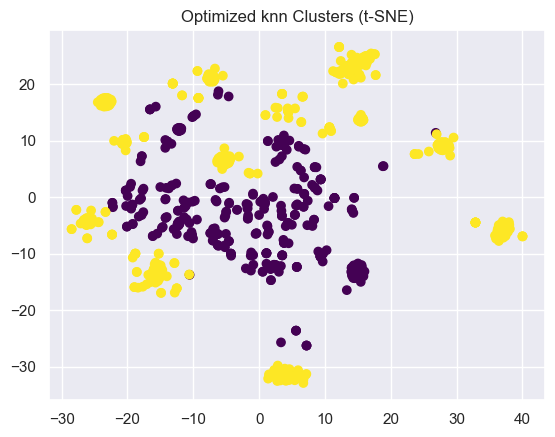

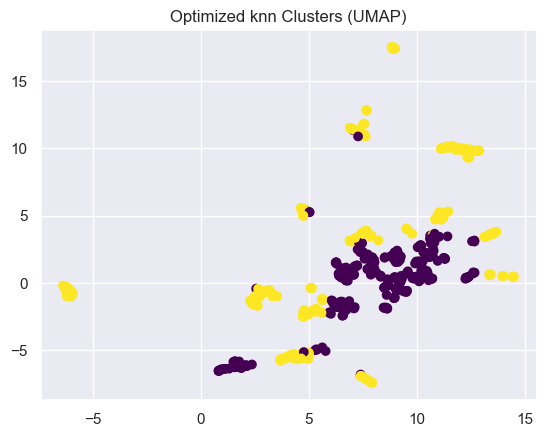

In [60]:
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=best_labels, cmap='viridis')
plt.title("Optimized knn Clusters (t-SNE)")
plt.show()

# Visualize using UMAP
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=best_labels, cmap='viridis')
plt.title("Optimized knn Clusters (UMAP)")
plt.show()

In [61]:
xmas_df["cluster_label"] = best_labels

# Filter rows where best_labels == 0
xmas_df_cluster_0 = xmas_df[xmas_df["cluster_label"] == 0]



                                                       runtime  imdb_rating  \
title                                                                         
Home Alone                                          103.000000     7.700000   
National Lampoon's Christmas Vacation                97.000000     7.500000   
Elf                                                  97.000000     7.100000   
How the Grinch Stole Christmas                      104.000000     6.300000   
The Grinch                                           85.000000     6.400000   
...                                                        ...          ...   
CBS News Sunday Morning with Jane Pauley: Episo...   86.626788     6.100477   
Honest Ads: If Holiday Movies Were Honest            86.626788     6.100477   
Cosmic Cowboys: Céréal Christmas                     86.626788     6.100477   
Proper Manors: Christmas Special: Christmas Par...   20.000000     6.100477   
Sacred Music at Christmas: A Choral Christmas       

In [63]:
xmas_df_cluster_0.describe()

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,cluster_label
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.0,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.0,358.000000,358.000000,358.000000,358.000000,358.0
mean,84.855577,6.108417,2002.572600,24012.371215,0.069832,0.0,0.170391,0.030726,0.036313,0.036313,...,0.005587,0.008380,0.011173,0.069832,0.0,0.002793,0.008380,0.005587,0.002793,0.0
std,23.806841,1.149710,23.478429,81520.919693,0.255221,0.0,0.376502,0.172817,0.187329,0.187329,...,0.074639,0.091285,0.105258,0.255221,0.0,0.052852,0.091285,0.074639,0.052852,0.0
min,1.000000,1.300000,1898.000000,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,84.000000,5.525000,1997.000000,663.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,87.000000,6.100477,2012.000000,2002.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,96.000000,6.700000,2018.000000,14465.853397,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
max,199.000000,9.200000,2023.000000,924658.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


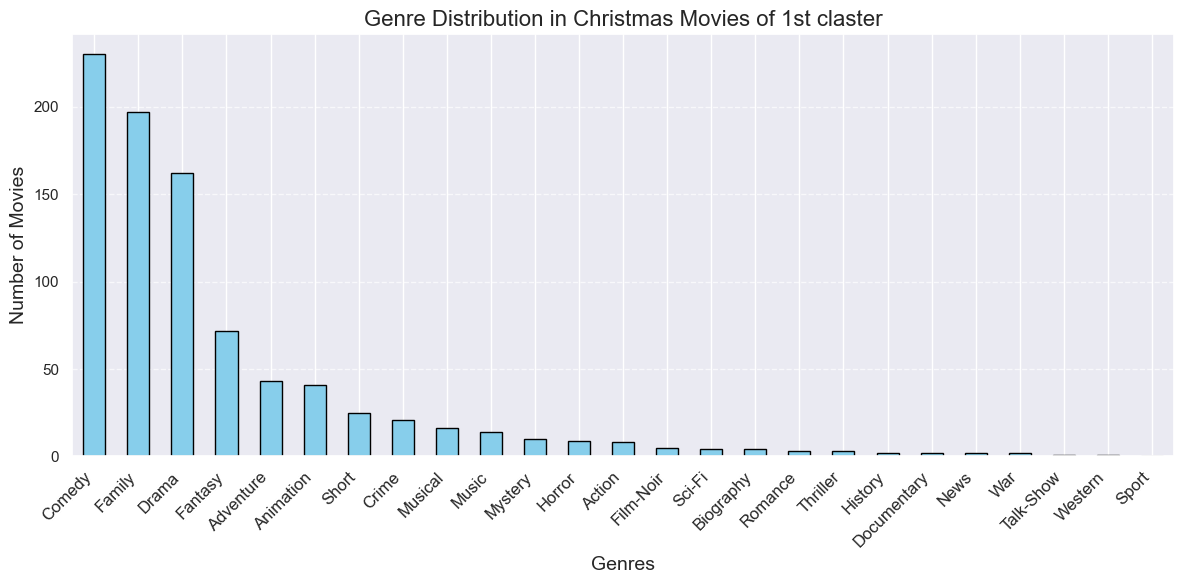

Comedy         230
Family         197
Drama          162
Fantasy         72
Adventure       43
Animation       41
Short           25
Crime           21
Musical         16
Music           14
Mystery         10
Horror           9
Action           8
Film-Noir        5
Sci-Fi           4
Biography        4
Romance          3
Thriller         3
History          2
Documentary      2
News             2
War              2
Talk-Show        1
Western          1
Sport            0
dtype: int64


In [ ]:
genre_columns = xmas_df_cluster_0.columns[17:42]  # Adjusted for Python's zero-based indexing

# Calculate the distribution of each genre
genre_distribution = xmas_df_cluster_0[genre_columns].sum().sort_values(ascending=False)

# Plot the genre distribution as a bar chart
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Genre Distribution in Christmas Movies of 1st claster", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the numerical distribution as a DataFrame
print(genre_distribution)


almost mo romanse films

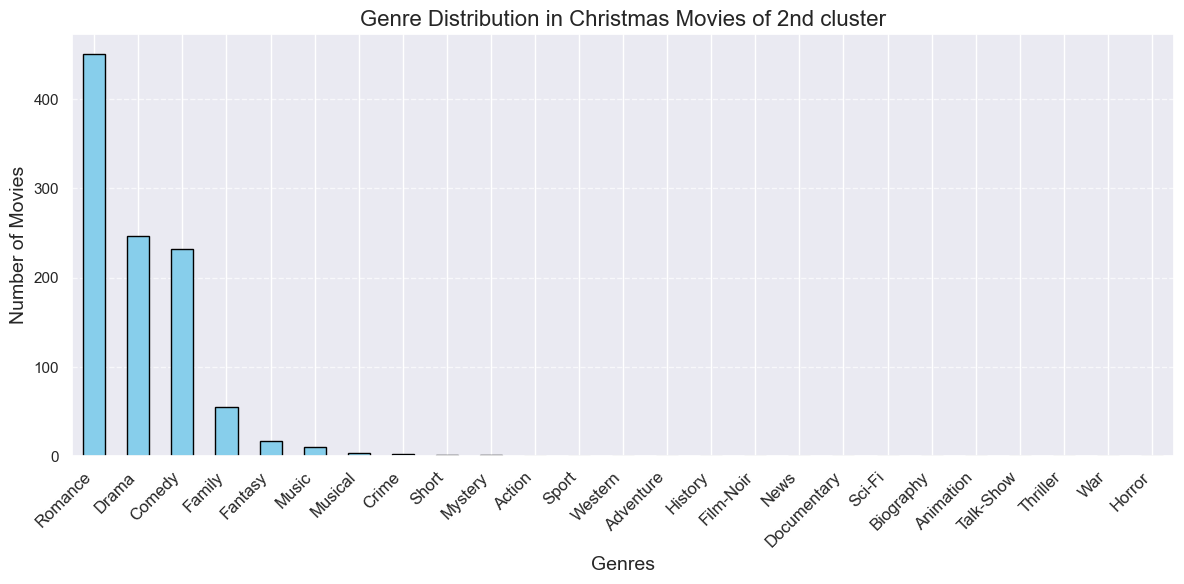

Romance        450
Drama          247
Comedy         232
Family          55
Fantasy         17
Music           10
Musical          4
Crime            3
Short            2
Mystery          2
Action           1
Sport            1
Western          1
Adventure        1
History          0
Film-Noir        0
News             0
Documentary      0
Sci-Fi           0
Biography        0
Animation        0
Talk-Show        0
Thriller         0
War              0
Horror           0
dtype: int64


In [66]:
genre_columns = xmas_df[xmas_df["cluster_label"] == 1].columns[17:42]  # Adjusted for Python's zero-based indexing

# Calculate the distribution of each genre
genre_distribution = xmas_df[xmas_df["cluster_label"] == 1][genre_columns].sum().sort_values(ascending=False)

# Plot the genre distribution as a bar chart
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Genre Distribution in Christmas Movies of 2nd cluster", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the numerical distribution as a DataFrame
print(genre_distribution)

## Hierarchical

In [102]:
# Function to compute pairwise distances between clusters
def compute_distances(clusters, data):
    """
    Computes pairwise distances between clusters for use in clustering algorithms.
    """
    n = len(clusters)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            cluster_i = np.array([data[idx] for idx in clusters[i]])
            cluster_j = np.array([data[idx] for idx in clusters[j]])
            distances[i, j] = distances[j, i] = np.mean([np.linalg.norm(x - y) for x in cluster_i for y in cluster_j])
    return distances

# Agglomerative Clustering with Optimization based on CH and DB indices
def hierarchical_clustering(X, min_clusters=2, max_clusters=10):
    """
    Perform Agglomerative Clustering with optimization based on Calinski-Harabasz and Davies-Bouldin indices.
    """
    n_samples = len(X)
    clusters = [[i] for i in range(n_samples)]  # Each data point starts as its own cluster
    best_clusters = None
    best_score = -np.inf  # For CH index
    best_db_score = np.inf  # For DB index

    for target_clusters in range(min_clusters, max_clusters + 1):
        temp_clusters = clusters[:]

        # Agglomerate clusters until we reach the target number
        while len(temp_clusters) > target_clusters:
            distances = compute_distances(temp_clusters, X)
            min_dist = np.inf
            to_merge = (0, 0)

            for i in range(len(temp_clusters)):
                for j in range(i + 1, len(temp_clusters)):
                    if distances[i, j] < min_dist:
                        min_dist = distances[i, j]
                        to_merge = (i, j)

            # Merge the two closest clusters
            i, j = to_merge
            new_cluster = temp_clusters[i] + temp_clusters[j]
            temp_clusters = [temp_clusters[k] for k in range(len(temp_clusters)) if k != i and k != j]
            temp_clusters.append(new_cluster)

        # Assign cluster labels for CH and DB evaluation
        labels = np.zeros(n_samples, dtype=int)
        for cluster_id, cluster in enumerate(temp_clusters):
            for idx in cluster:
                labels[idx] = cluster_id

        # Calculate CH and DB indices
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)

        # Optimization: Select best clustering based on a combination of CH (maximize) and DB (minimize)
        if ch_score - db_score > best_score - best_db_score:
            best_clusters = temp_clusters
            best_score = ch_score
            best_db_score = db_score

    return best_clusters, best_score, best_db_score





In [ ]:
min_clusters = 4
X = np.array(xmas_df_cluster_0)
max_clusters = 4
best_clusters, best_ch_score, best_db_score = hierarchical_clustering(X, min_clusters, max_clusters)

print("Best Clusters:", best_clusters)
print("Best Calinski-Harabasz Score:", best_ch_score)
print("Best Davies-Bouldin Score:", best_db_score)

Best Clusters: [[56, 309], [357, 351, 353], [5, 37, 213, 302, 27, 29], [356, 170, 324, 130, 197, 31, 6, 19, 311, 262, 153, 194, 97, 257, 132, 316, 106, 303, 86, 332, 58, 219, 146, 232, 308, 317, 321, 340, 162, 251, 30, 41, 14, 15, 39, 80, 7, 233, 268, 320, 315, 319, 61, 48, 54, 272, 25, 63, 38, 47, 89, 221, 109, 70, 82, 57, 164, 254, 128, 60, 68, 284, 91, 323, 84, 98, 352, 184, 305, 275, 347, 354, 344, 338, 348, 209, 244, 329, 76, 21, 50, 148, 1, 297, 216, 277, 328, 287, 288, 273, 22, 100, 289, 343, 210, 143, 185, 114, 59, 23, 72, 229, 259, 342, 136, 191, 139, 200, 236, 294, 10, 16, 212, 66, 77, 307, 336, 339, 238, 261, 228, 141, 313, 252, 214, 131, 345, 285, 300, 327, 335, 8, 120, 12, 32, 9, 264, 36, 217, 75, 274, 144, 171, 227, 42, 83, 181, 202, 231, 258, 51, 237, 45, 279, 260, 111, 249, 211, 52, 53, 286, 325, 263, 104, 168, 165, 158, 115, 126, 133, 122, 201, 103, 135, 142, 20, 298, 176, 293, 90, 107, 178, 127, 166, 110, 151, 223, 134, 205, 161, 93, 124, 182, 198, 226, 137, 183, 172,

In [81]:
xmas_df_cluster_0.columns

Index(['runtime', 'imdb_rating', 'release_year', 'votes', 'rating_G',
       'rating_Not Rated', 'rating_PG', 'rating_PG-13', 'rating_Passed',
       'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA',
       'rating_TV-PG', 'rating_TV-Y', 'rating_Unrated', 'type_TV Episode',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       'cluster_label'],
      dtype='object')

In [88]:
xmas_df_cluster_0 = preprocess_data(xmas_df_cluster_0)



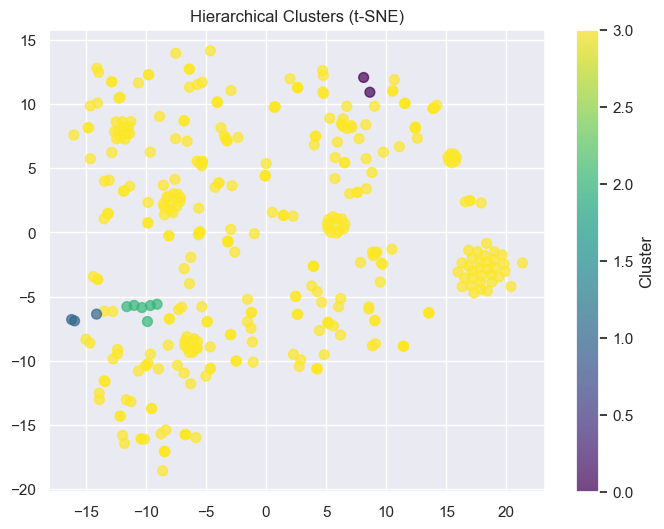

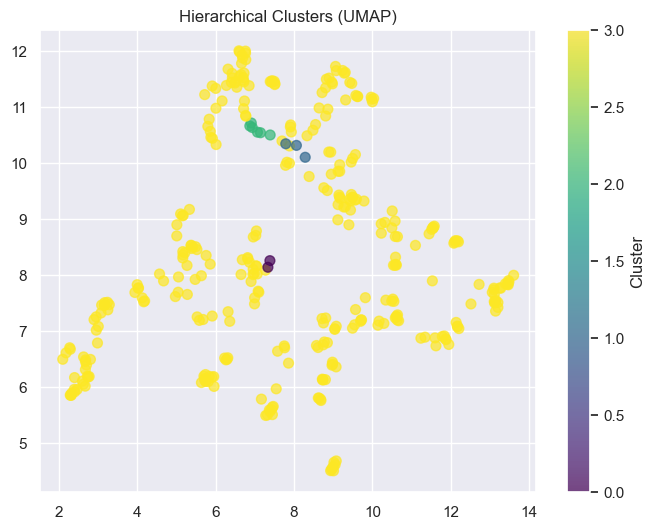

In [94]:
n_samples = X.shape[0]
flat_labels = np.zeros(n_samples, dtype=int)  # Initialize labels

for cluster_idx, cluster_points in enumerate(best_clusters):
    for point in cluster_points:
        flat_labels[point] = cluster_idx  # Assign cluster index to each point

# Visualize using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=flat_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Hierarchical Clusters (t-SNE)")
plt.colorbar(label="Cluster")
plt.show()

# Visualize using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=flat_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Hierarchical Clusters (UMAP)")
plt.colorbar(label="Cluster")
plt.show()

In [95]:
xmas_df_cluster_1 = xmas_df[xmas_df["cluster_label"] == 1]

In [99]:
xmas_df_cluster_1 = xmas_df_cluster_1.drop('cluster_label', axis = 1)

In [101]:
xmas_df_cluster_1 = preprocess_data(xmas_df_cluster_1)

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
Love Actually,135.000000,7.600000,2003.00000,517283.000000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Four Christmases,88.000000,5.700000,2008.00000,78898.000000,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Best. Christmas. Ever!,82.000000,4.400000,2023.00000,8063.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Little Women,135.000000,7.800000,2019.00000,234116.000000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Holidate,104.000000,6.100000,2020.00000,76442.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cowgirl's Christmas Romance,86.626788,6.100477,2009.49884,14465.853397,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
A Very Covid Christmas,49.000000,6.100477,2020.00000,14465.853397,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Pasko ng limang Magdalena,86.626788,6.100477,1965.00000,14465.853397,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Best Clusters: [[17], [0, 11], [3, 46], [10, 22, 27, 18, 13, 63, 235, 78, 137, 117, 23, 245, 120, 144, 167, 43, 147, 56, 93, 73, 39, 106, 38, 274, 435, 72, 141, 95, 37, 376, 433, 163, 407, 386, 430, 169, 417, 45, 79, 374, 349, 408, 356, 405, 445, 439, 450, 415, 444, 305, 394, 413, 422, 421, 328, 438, 366, 369, 51, 363, 365, 441, 308, 423, 402, 76, 184, 156, 254, 375, 382, 373, 247, 326, 322, 243, 336, 68, 131, 389, 186, 360, 118, 16, 208, 179, 344, 183, 310, 182, 299, 89, 211, 412, 427, 291, 122, 283, 64, 270, 353, 30, 396, 58, 69, 273, 404, 130, 362, 134, 352, 383, 416, 377, 207, 409, 90, 298, 276, 443, 315, 431, 329, 424, 387, 398, 437, 442, 428, 31, 269, 340, 199, 393, 261, 44, 234, 205, 330, 347, 258, 400, 198, 101, 358, 411, 21, 406, 252, 279, 271, 161, 231, 371, 47, 339, 96, 420, 426, 359, 401, 256, 307, 378, 151, 410, 222, 395, 392, 429, 124, 357, 28, 319, 361, 432, 223, 333, 296, 293, 157, 241, 338, 262, 244, 99, 295, 185, 414, 119, 55, 236, 125, 138, 249, 166, 233, 419, 82, 38

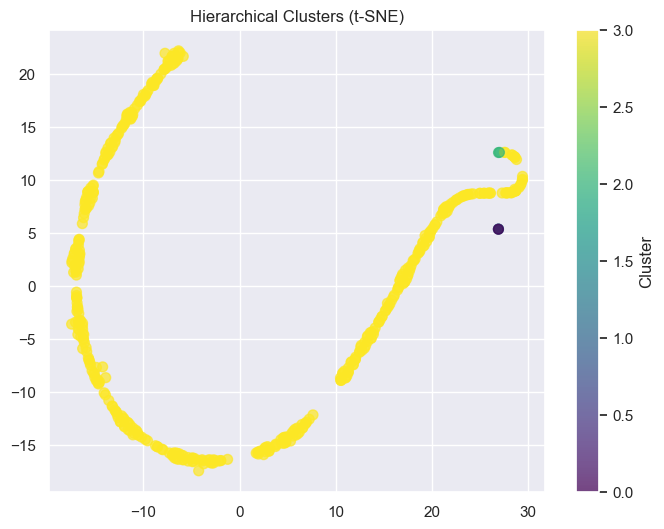

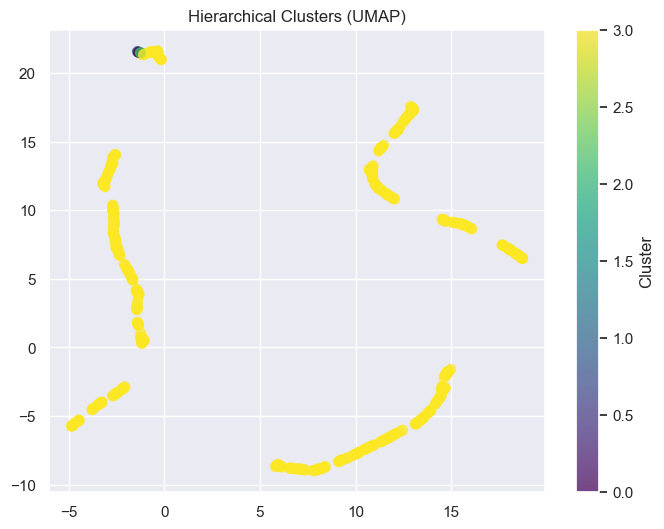

In [103]:
min_clusters = 4
X = np.array(xmas_df_cluster_1)
max_clusters = 4
best_clusters, best_ch_score, best_db_score = hierarchical_clustering(X, min_clusters, max_clusters)

print("Best Clusters:", best_clusters)
print("Best Calinski-Harabasz Score:", best_ch_score)
print("Best Davies-Bouldin Score:", best_db_score)



n_samples = X.shape[0]
flat_labels = np.zeros(n_samples, dtype=int)  # Initialize labels

for cluster_idx, cluster_points in enumerate(best_clusters):
    for point in cluster_points:
        flat_labels[point] = cluster_idx  # Assign cluster index to each point

# Visualize using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=flat_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Hierarchical Clusters (t-SNE)")
plt.colorbar(label="Cluster")
plt.show()

# Visualize using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=flat_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Hierarchical Clusters (UMAP)")
plt.colorbar(label="Cluster")
plt.show()

In [109]:
xmas_df_cluster_1.loc[xmas_df_cluster_1.index[17]]


runtime                122.0
imdb_rating              7.7
release_year          2012.0
votes               734121.0
rating_G                 0.0
rating_Not Rated         0.0
rating_PG                0.0
rating_PG-13             0.0
rating_Passed            0.0
rating_R                 1.0
rating_TV-14             0.0
rating_TV-G              0.0
rating_TV-MA             0.0
rating_TV-PG             0.0
rating_TV-Y              0.0
rating_Unrated           0.0
type_TV Episode          0.0
Action                   0.0
Adventure                0.0
Animation                0.0
Biography                0.0
Comedy                   1.0
Crime                    0.0
Documentary              0.0
Drama                    1.0
Family                   0.0
Fantasy                  0.0
Film-Noir                0.0
History                  0.0
Horror                   0.0
Music                    0.0
Musical                  0.0
Mystery                  0.0
News                     0.0
Romance       

In [108]:
xmas_df_cluster_1.index[17]

'Silver Linings Playbook'

Comedy, Romance, Drama, Raiting R

In [125]:
for i in xmas_df_cluster_1.loc[xmas_df_cluster_1.index[[0,11]]].columns:
    if
    print(i)

SyntaxError: invalid syntax (3799673304.py, line 2)

In [127]:
xmas_df_cluster_1.loc[xmas_df_cluster_1.index[[0,11]]]

,runtime,imdb_rating,release_year,votes,rating_G,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
Love Actually,135.0,7.6,2003.0,517283.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Edward Scissorhands,105.0,7.9,1990.0,515997.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [128]:
subset = xmas_df_cluster_1.loc[xmas_df_cluster_1.index[[0, 11]]]

# Проверяем каждую строку на нулевые значения и выводим названия колонок
for idx in subset.index:
    for col in subset.columns:
        if (subset.at[idx, col] != 0):
            print(idx,col, subset.at[idx, col])

Love Actually runtime 135.0
Love Actually imdb_rating 7.6
Love Actually release_year 2003.0
Love Actually votes 517283.0
Love Actually rating_R 1
Love Actually Comedy 1
Love Actually Drama 1
Love Actually Romance 1
Edward Scissorhands runtime 105.0
Edward Scissorhands imdb_rating 7.9
Edward Scissorhands release_year 1990.0
Edward Scissorhands votes 515997.0
Edward Scissorhands rating_PG-13 1
Edward Scissorhands Drama 1
Edward Scissorhands Fantasy 1
Edward Scissorhands Romance 1


**There are only two huge clusters: Romance and Family comedies**

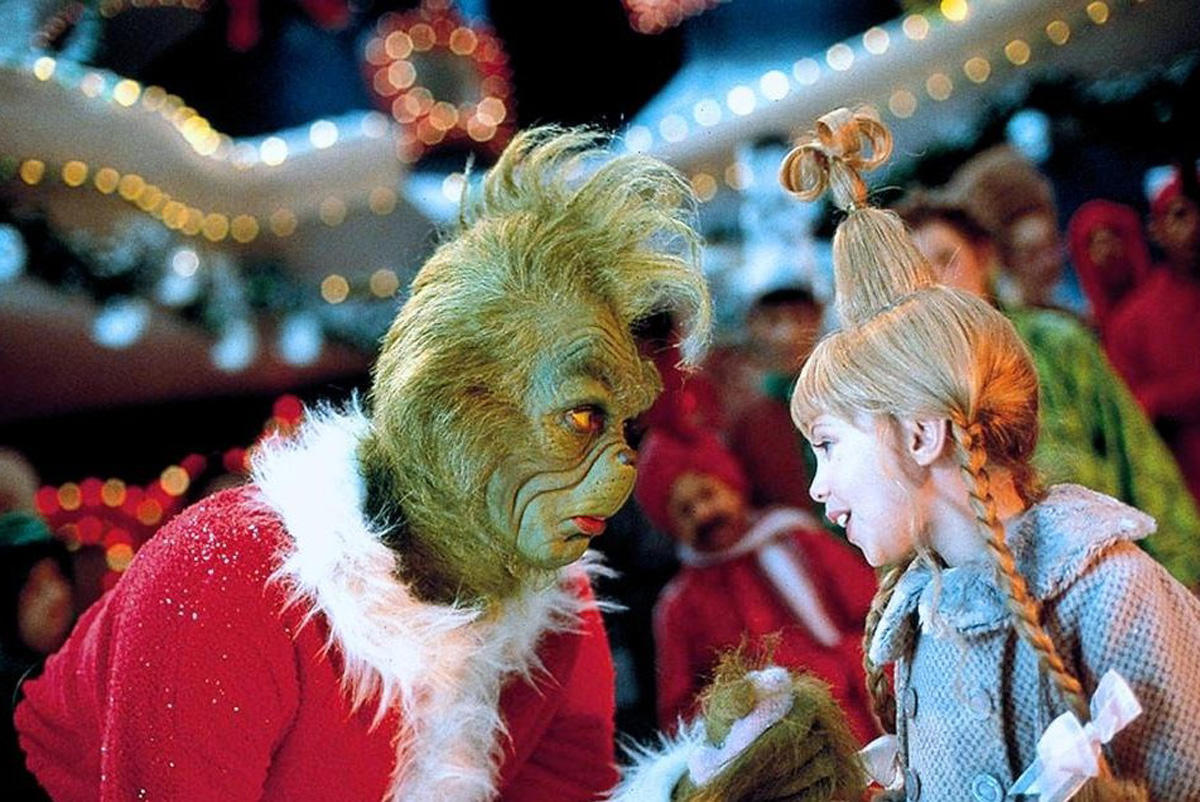